In [32]:
import pandas as pd
import numpy as np
#读取数据
data = pd.read_csv('train\\all.csv',
            names=['FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ','F2','F4','F6'
            ,'F8','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','T7','C5'
            ,'C3','C1','CZ','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2'
            ,'CP4','CP6','TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8','PO7'
            ,'PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ','O2','CB2'],
            skiprows=0,skipfooter=0,
            sep=',',index_col=False,engine="python")
#print(data)
#数据列长62，将dataframe中的列全部显示出来
pd.set_option('display.max_columns', None)
#输出属性行
#print(data.columns)
data1 = np.array([3,2,1,1,2,3,1,2,3,3,2,1,2,3,1])
data2 = data1
for i in range(44):
    data2 = np.append(data2,data1)
print(len(data2))
#将新列的名字设置为label
#data['label'] = data2 
#mode=a，以追加模式写入,header表示列名，默认为true,index表示行名，默认为true，再次写入不需要行名
#data.to_csv('test_1.csv',mode = 'a',index =False)

#将label和data分离
#data=pd.read_csv('1_1.csv',
                   #sep=',',index_col=False,engine="python")
print(data)




675


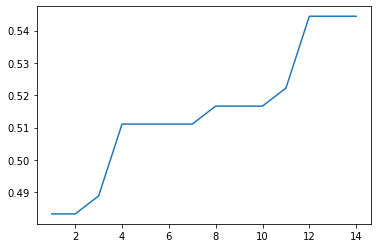

准确率： 0.5166666666666667
[0.35555556 0.34814815 0.37777778 0.36296296 0.33333333]
0.3555555555555555
0.014814814814814819


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#三分类
#将label和data分离
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")

#选取特征值:前额叶区通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4']
#抽取数据作为测试集，其余作为训练集
#train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
#train_X = train[features_remain]
#train_y=train['label']
#test_X= test[features_remain]
#test_y =test['label']
#print(train)
#print(test)
#model = SVC(kernel='rbf', C=9, gamma='auto')
#用训练集训练：
#model.fit(train_X, train_y)
#print(model.classes_)
#用测试集预测：
#prediction1 = model.predict(test_X)
#调参C
accuracy = []
x = np.arange(1, 15, 1)
k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)

data2=data[features_remain]
data_label=data['label']

#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


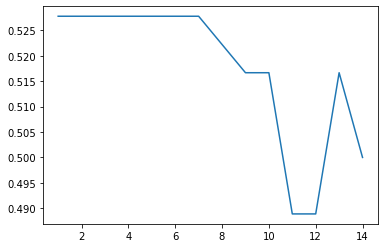

准确率： 0.5166666666666667
[0.51111111 0.51111111 0.42222222 0.54444444 0.56666667]
0.5111111111111111
0.04919098582484145


In [22]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于3 的行,取反
data = data[~data['label'].isin([3])] 
#print(data)

#选取特征值:前额叶区通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)

data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


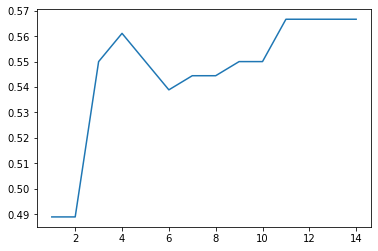

准确率： 0.55
[0.52222222 0.48888889 0.64444444 0.47777778 0.51111111]
0.5288888888888889
0.05987641593469992


In [6]:
import pandas as pd
import numpy as np
data=pd.read_csv('test_1.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于2 的行,取反
data = data[~data['label'].isin([2])] 
#print(data)

#选取特征值:前额叶区通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


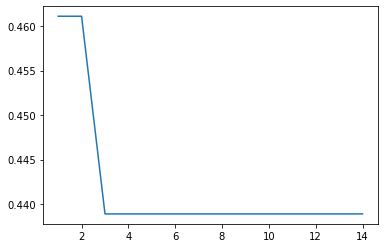

准确率： 0.4388888888888889
[0.53333333 0.53333333 0.54444444 0.55555556 0.44444444]
0.5222222222222224
0.03975231959999627


In [23]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于2 的行,取反
data = data[~data['label'].isin([1])] 
#print(data)

#选取特征值:前额叶区通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())



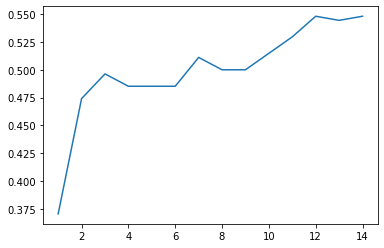

准确率： 0.5
[0.54814815 0.53333333 0.51111111 0.38518519 0.56296296]
0.5081481481481481
0.0638241754919645


In [24]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于2 的行,取反
#data = data[~data['label'].isin([3])] 
#print(data)

#选取特征值:62通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ','F2','F4','F6'
            ,'F8','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','T7','C5'
            ,'C3','C1','CZ','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2'
            ,'CP4','CP6','TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8','PO7'
            ,'PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


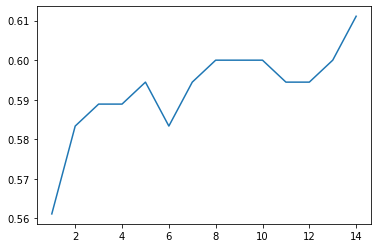

准确率： 0.6
[0.55555556 0.56666667 0.66666667 0.51111111 0.58888889]
0.5777777777777777
0.05115939748098373


In [25]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于3的行,取反
data = data[~data['label'].isin([3])] 
#print(data)

#选取特征值:62通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ','F2','F4','F6'
            ,'F8','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','T7','C5'
            ,'C3','C1','CZ','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2'
            ,'CP4','CP6','TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8','PO7'
            ,'PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


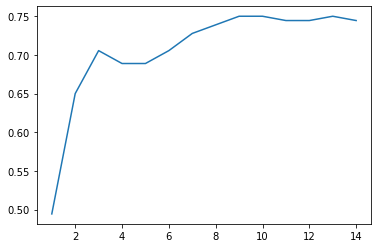

准确率： 0.75
[0.71111111 0.81111111 0.6        0.64444444 0.75555556]
0.7044444444444444
0.07555555555555556


In [26]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于2的行,取反
data = data[~data['label'].isin([2])] 
#print(data)

#选取特征值:62通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ','F2','F4','F6'
            ,'F8','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','T7','C5'
            ,'C3','C1','CZ','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2'
            ,'CP4','CP6','TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8','PO7'
            ,'PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


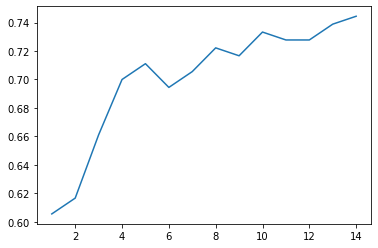

准确率： 0.7166666666666667
[0.75555556 0.74444444 0.65555556 0.58888889 0.77777778]
0.7044444444444444
0.07118052168020873


In [27]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于1的行,取反
data = data[~data['label'].isin([1])] 
#print(data)

#选取特征值:62通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ','F2','F4','F6'
            ,'F8','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','T7','C5'
            ,'C3','C1','CZ','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2'
            ,'CP4','CP6','TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8','PO7'
            ,'PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', C=9, gamma='auto')
#对分类器进行交叉验证
scores = cross_val_score(model, data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())

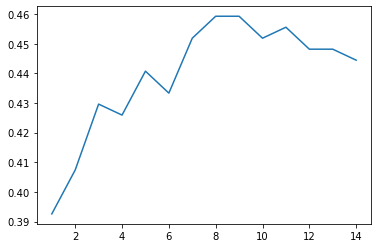

准确率： 0.45925925925925926
[0.51851852 0.58518519 0.47407407 0.38518519 0.46666667]
0.48592592592592593
0.0656882941552455


In [28]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
# 选取出label等于3的行,取反
#data = data[~data['label'].isin([3])] 
#print(data)

#选取特征值:53通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F3','F1','FZ','F2'
            ,'FC5','FC3','FC1','FCZ','FC2','FC4','FC6','C5','C3','C1','C2'
            ,'C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6'
            ,'TP8','P7','P5','P3','PZ','P2','P4','P6','P8','PO7','PO5','PO3'
            ,'POZ','PO4','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


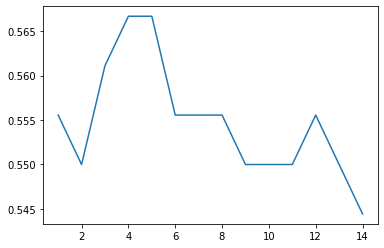

准确率： 0.55
[0.63333333 0.58888889 0.72222222 0.52222222 0.56666667]
0.6066666666666667
0.06798692684790378


In [29]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于3的行,取反
data = data[~data['label'].isin([3])] 
#print(data)

#选取特征值:53通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F3','F1','FZ','F2'
            ,'FC5','FC3','FC1','FCZ','FC2','FC4','FC6','C5','C3','C1','C2'
            ,'C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6'
            ,'TP8','P7','P5','P3','PZ','P2','P4','P6','P8','PO7','PO5','PO3'
            ,'POZ','PO4','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)

data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())



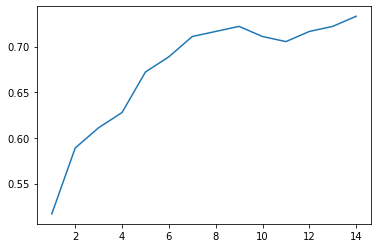

准确率： 0.7222222222222222
[0.67777778 0.86666667 0.57777778 0.62222222 0.67777778]
0.6844444444444445
0.0985324412328683


In [30]:
import pandas as pd
import numpy as np
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于2的行,取反
data = data[~data['label'].isin([2])] 
#print(data)

#选取特征值:53通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F3','F1','FZ','F2'
            ,'FC5','FC3','FC1','FCZ','FC2','FC4','FC6','C5','C3','C1','C2'
            ,'C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6'
            ,'TP8','P7','P5','P3','PZ','P2','P4','P6','P8','PO7','PO5','PO3'
            ,'POZ','PO4','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)

data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


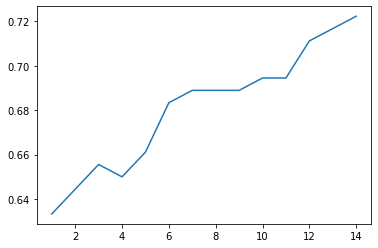

准确率： 0.6888888888888889
[0.7        0.8        0.65555556 0.57777778 0.68888889]
0.6844444444444445
0.07187094057242771


In [31]:

data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于1的行取反
data = data[~data['label'].isin([1])] 
#print(data)

#选取特征值:53通道
features_remain = ['FP1','FP1','FPZ','FP2','AF3','AF4','F3','F1','FZ','F2'
            ,'FC5','FC3','FC1','FCZ','FC2','FC4','FC6','C5','C3','C1','C2'
            ,'C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6'
            ,'TP8','P7','P5','P3','PZ','P2','P4','P6','P8','PO7','PO5','PO3'
            ,'POZ','PO4','PO8','CB1','O1','OZ','O2','CB2']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())



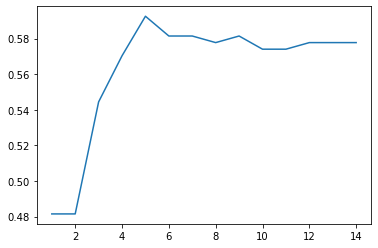

准确率： 0.5814814814814815
[0.57777778 0.58518519 0.51111111 0.48888889 0.62222222]
0.557037037037037
0.04944687190601078


In [32]:
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于1的行取反
#data = data[~data['label'].isin([1])] 
#print(data)

#选取特征值:12通道
features_remain = ['FT7','FT8','T7','T8','C5','C6','TP7','TP8','CP5','CP6','P7','P8']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


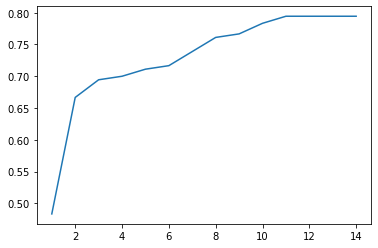

准确率： 0.7666666666666667
[0.81111111 0.88888889 0.67777778 0.83333333 0.86666667]
0.8155555555555555
0.07390350732584838


In [33]:
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于2的行取反
data = data[~data['label'].isin([2])] 
#print(data)

#选取特征值:12通道
features_remain = ['FT7','FT8','T7','T8','C5','C6','TP7','TP8','CP5','CP6','P7','P8']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)


data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


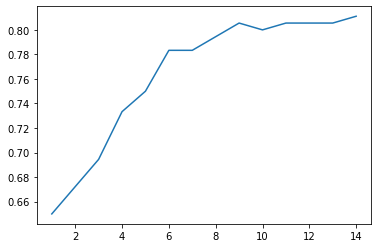

准确率： 0.8055555555555556
[0.77777778 0.82222222 0.72222222 0.78888889 0.88888889]
0.8
0.054884840156570955


In [35]:
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于1的行取反
data = data[~data['label'].isin([1])] 
#print(data)

#选取特征值:12通道
features_remain = ['FT7','FT8','T7','T8','C5','C6','TP7','TP8','CP5','CP6','P7','P8']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)

data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())


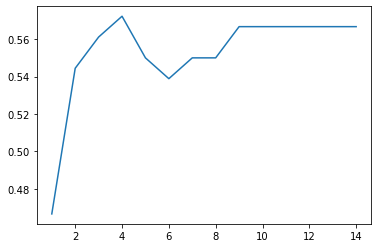

准确率： 0.5666666666666667
[0.6        0.52222222 0.62222222 0.5        0.6       ]
0.5688888888888889
0.04838120234906052


In [34]:
data=pd.read_csv('test\\test.csv',
                   sep=',',index_col=False,engine="python")
#删除行
#选取出label等于3的行取反
data = data[~data['label'].isin([3])] 
#print(data)

#选取特征值:12通道
features_remain = ['FT7','FT8','T7','T8','C5','C6','TP7','TP8','CP5','CP6','P7','P8']
#抽取数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.4)
#抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['label']
test_X= test[features_remain]
test_y =test['label']
#print(train)
#print(test)
model = SVC(kernel='rbf', C=9, gamma='auto')
# 用训练集训练：
model.fit(train_X, train_y)
#print(model.classes_)
# 用测试集预测：
prediction1 = model.predict(test_X)
#x=c y=accuracy
accuracy = []
x = np.arange(1, 15, 1)
#k=0
for i in x:
    model = SVC(kernel='rbf', C=i, gamma='auto')
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy.append(metrics.accuracy_score(prediction, test_y))
    #k=max(metrics.accuracy_score(prediction, test_y),k)
k=metrics.accuracy_score(prediction1, test_y)
y = np.array(accuracy)
plt.plot(x, y)
plt.show()
print('准确率：', k)

data2=data[features_remain]
data_label=data['label']
#创建svm分类器对象
model = SVC(kernel='rbf', gamma='auto')
#对分类器进行交叉验证
gs=GridSearchCV(estimator=model,
                param_grid=[{'C':[1,2,3,4,5,6,7,8,9,10]}],
                scoring='accuracy',
                cv=5)
scores = cross_val_score(gs,data2, data_label, cv=5)
#查看验证结果
print(scores)
#查看均值
print(scores.mean())
#查看标准差
print(scores.std())

